# Sur quels paramètres l'altitude influe-t-elle le plus ?

Du fait de la haute altitude de Mexico City, les voitures ont plus de problèmes. On peut citer par exemple les problèmes de moteur, de turbo ou de refroidissement (https://www.motorsinside.com/f1/actualite/32064-les-consequences-haute-altitude-mexico-pilotes-f1-2286m-daltitude.html).

In [20]:
class Course:
    def __init__(self, resultId : int, location : str, status : str):
        self.resultId = resultId
        self.location = location
        self.status = status

In [23]:
from methodes_pures import read_csv, merge

liste_courses = []

results = read_csv('../data/results.csv')
races = read_csv('../data/races.csv')
circuits = read_csv('../data/circuits.csv')
status = read_csv('../data/status.csv')

# jointure = merge(status, merge(circuits, merge(results, races, 'raceId'), 'circuitId'), 'statusId')

ImportError: cannot import name 'merge' from 'methodes_pures' (c:\DEVOIRS\ENSAI1A\projet-info\questions_obligatoires\methodes_pures.py)

In [ ]:
nb_location = len(circuits)

def nombre_status_mexico(status):
    nb = 0
    for course in liste_courses:
        if course.location == 'Mexico City' and course.status == status:
            nb += 1
    return nb


def moyenne_satus_global(status):
    somme = 0
    for course in liste_courses:
        if course.status == status:
            somme += 1
    return somme/nb_location


NameError: name 'circuits' is not defined

## Code

In [ ]:
import pandas as pd

results = pd.read_csv(
                'C:/DEVOIRS/ENSAI1A/projet-info/data/results.csv'
                )
status = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/status.csv')
races = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/races.csv')
circuits = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/circuits.csv')

jointure = pd.merge(results, status, on='statusId', how='left')
jointure = pd.merge(jointure, races, on='raceId', how='left')
jointure = pd.merge(jointure, circuits, on='circuitId', how='left')

jointure = jointure[['resultId', 'location', 'statusId', 'status']]
jointure

,resultId,location,statusId,status
0,1,Melbourne,1,Finished
1,2,Melbourne,1,Finished
2,3,Melbourne,1,Finished
3,4,Melbourne,1,Finished
4,5,Melbourne,1,Finished
...,...,...,...,...
26514,26520,Silverstone,12,+2 Laps
26515,26521,Silverstone,12,+2 Laps
26516,26522,Silverstone,12,+2 Laps
26517,26523,Silverstone,34,Water pressure


### Problèmes moteur

In [55]:
jointure_pb_moteur = jointure[jointure['statusId'] == 5]
pb_moteur_par_ville = jointure_pb_moteur.groupby('location').size()
moyenne_pb_moteur_par_ville = pb_moteur_par_ville.mean()

nb_pb_moteur_mexique = len(jointure[jointure.statusId == 5][jointure.location == 'Mexico City'])
nb_pb_moteur_mexique

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_17508/254012180.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nb_pb_moteur_mexique = len(jointure[jointure.statusId == 5][jointure.location == 'Mexico City'])


50

### Problèmes de turbo

In [82]:
jointure_pb_turbo = jointure[jointure['statusId'] == 101]
pb_turbo_par_ville = jointure_pb_turbo.groupby('location').size()
moyenne_pb_turbo_par_ville = pb_turbo_par_ville.mean()

nb_pb_turbo_mexique = len(jointure[jointure.statusId == 101][jointure.location == 'Mexico City'])
nb_pb_turbo_mexique

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_17508/4065419009.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nb_pb_turbo_mexique = len(jointure[jointure.statusId == 101][jointure.location == 'Mexico City'])


7

### Problèmes de refroidissement

In [57]:
jointure_pb_refroidissement = jointure[jointure['statusId'] == 25]
pb_refroidissement_par_ville = jointure_pb_refroidissement.groupby('location').size()
moyenne_pb_refroidissement_par_ville = pb_refroidissement_par_ville.mean()

nb_pb_refroidissement_mexique = len(jointure[jointure.statusId == 25][jointure.location == 'Mexico City'])
nb_pb_refroidissement_mexique

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_17508/592535335.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nb_pb_refroidissement_mexique = len(jointure[jointure.statusId == 25][jointure.location == 'Mexico City'])


8

## Graphique

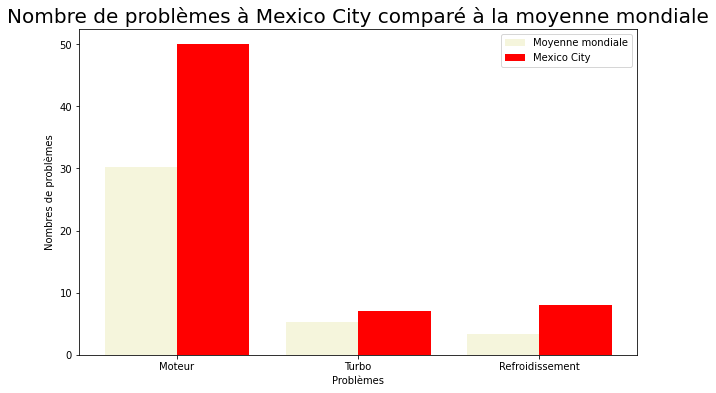

In [83]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def double_barplot():
    plt.figure(figsize=(10, 6))

    # Abscisses
    x = ['Moteur', 'Turbo', 'Refroidissement']

    # Hauteurs
    nb_total = [moyenne_pb_moteur_par_ville, moyenne_pb_turbo_par_ville, moyenne_pb_refroidissement_par_ville]
    nb_mexico = [nb_pb_moteur_mexique, nb_pb_turbo_mexique, nb_pb_refroidissement_mexique]

    # Barplots
    plt.bar(x=x, height=nb_total, width=-0.4, align='edge', color='beige')
    plt.bar(x=x, height=nb_mexico, width=+0.4, align='edge', color='red')

    plt.xticks(x)
    plt.xlabel('Problèmes')
    plt.ylabel('Nombres de problèmes')
    plt.title('Nombre de problèmes à Mexico City comparé à la moyenne mondiale', fontsize=20)

    # Légende
    plt.legend(['Moyenne mondiale', 'Mexico City'])

    # Affichage de la figure
    plt.show()


double_barplot()